<a href="https://colab.research.google.com/github/haiyanwa/Python-workshop/blob/master/workshop_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir /content/drive/MyDrive/decisionTree
%cd /content/drive/MyDrive/decisionTree
!ls

/content/drive/MyDrive/decisionTree
Advertising.csv  Cancer_small.csv  Credit.csv	Income2.csv
Auto.csv	 Ch10Ex11.csv	   Heart.csv	iris.csv
Auto.data.txt	 College.csv	   Income1.csv	ISRL.zip


In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
#!mv iris.data iris.csv

In [ ]:
columns = ['sepalLengthCm','seppalWidthCm','petalLengthCm','petalWidthCm','species']
df = pd.read_csv("/content/drive/MyDrive/decisionTree/iris.csv", names = columns)

In [ ]:
df[0:10]

,sepalLengthCm,seppalWidthCm,petalLengthCm,petalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_X = df[['sepalLengthCm','seppalWidthCm','petalLengthCm','petalWidthCm']]
iris_X.head()

,sepalLengthCm,seppalWidthCm,petalLengthCm,petalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_y = df[['species']]
iris_y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=36)


In [ ]:
print("X_train", len(X_train))
print("y_train", len(y_train))

print("X_test", len(X_test))
print("y_test", len(y_test))

X_train 105
y_train 105
X_test 45
y_test 45


In [ ]:
DTree_clf = DecisionTreeClassifier(random_state=2, max_depth=2)
DTree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [ ]:
#DTree_clf = DecisionTreeClassifier(random_state=36, max_depth=2)
#scores = cross_val_score(clf, iris_X, iris_y, cv=5)
#scores

In [ ]:
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
y_predict = DTree_clf.predict(X_test)

In [ ]:
y_test[0:10]

,species
50,Iris-versicolor
145,Iris-virginica
86,Iris-versicolor
118,Iris-virginica
122,Iris-virginica
57,Iris-versicolor
56,Iris-versicolor
51,Iris-versicolor
69,Iris-versicolor
66,Iris-versicolor


In [ ]:
y_predict[0:10]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [ ]:
accuracy_score(y_test, y_predict)

0.9777777777777777

In [ ]:
##Cross validation

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.65\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.184\nsamples = 39\nvalue = [0, 35, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

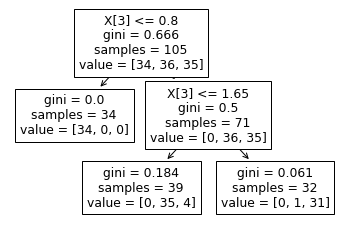

In [ ]:
tree.plot_tree(DTree_clf)

In [ ]:
#graph = Source(tree.export_graphviz(clf))
names = iris_X.columns
print(names)
graph = Source(tree.export_graphviz(DTree_clf ,feature_names = names, class_names = iris_y['species'].unique(), max_depth = 2, filled = True))

Index(['sepalLengthCm', 'seppalWidthCm', 'petalLengthCm', 'petalWidthCm'], dtype='object')


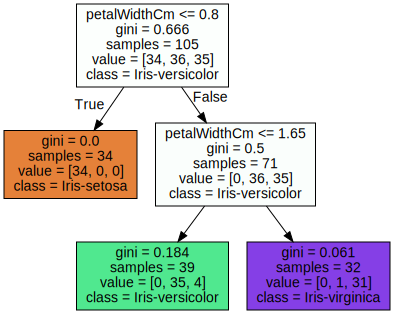

In [ ]:
display(SVG(graph.pipe(format='svg')))


In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/decisionTree/Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
df_heart.shape

(303, 15)

In [ ]:
##check if there's any null data
df_heart.isna().any()

Unnamed: 0    False
Age           False
Sex           False
ChestPain     False
RestBP        False
Chol          False
Fbs           False
RestECG       False
MaxHR         False
ExAng         False
Oldpeak       False
Slope         False
Ca             True
Thal           True
AHD           False
dtype: bool

In [ ]:
##find out how many null values
print(df_heart.Thal.isnull().sum())
print(df_heart.Ca.isnull().sum())

2
4


In [ ]:
##check which rows have missing values
df_heart[df_heart.Ca.isnull()].index.tolist()

[166, 192, 287, 302]

In [ ]:
##drop rows with NaN value in Ca
df_heart.dropna(axis=0, subset=['Ca'],inplace=True)

In [ ]:
df_heart.shape
#df_heart[df_heart.Thal.isnull()].index.tolist()

(299, 15)

In [ ]:
##create target y with AHD column
heart_y = df_heart['AHD']
heart_y

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
297    Yes
298    Yes
299    Yes
300    Yes
301    Yes
Name: AHD, Length: 299, dtype: object

In [ ]:
##remove ID and target from X
heart_X = df_heart.drop(columns=['Unnamed: 0', 'AHD'])
heart_X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable


In [ ]:
#Thal: Thallium stress test
#AHD: Yes indicates the presence of heart disease based on an angiographic test

In [ ]:
##Use OneHotEncoding for categorical data
from sklearn.preprocessing import OneHotEncoder
#help(OneHotEncoder)

In [ ]:
heart_X.columns[heart_X.dtypes == "object"]
print(heart_X['ChestPain'].unique())
print(heart_X['Thal'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable' nan]


In [ ]:
(heart_X_train, heart_X_test, heart_y_train, heart_y_test) = train_test_split(heart_X, heart_y, test_size=0.2, random_state=2)
print(heart_X_train.shape)
print(heart_y_train.shape)

(239, 13)
(239,)


In [ ]:
from tables.unimplemented import Unknown
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_cols = heart_X.columns[heart_X_train.dtypes == "object"]
categorical_cols
#heart_X[categorical_cols]
#heart_X.select_dtypes('object')

Index(['ChestPain', 'Thal'], dtype='object')

In [ ]:
##use make_column_transformer
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(), ['ChestPain','Thal']),
    remainder='passthrough')
X_train_transformed = transformer.fit_transform(heart_X_train)
X_test_transformed = transformer.transform(heart_X_test)

##change back to dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names())
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names())

##add back the indexes
X_train_transformed_df.index = heart_X_train.index
X_test_transformed_df.index = heart_X_test.index

print(X_train_transformed_df.head(10))
print(X_test_transformed_df.head(10))

     onehotencoder__x0_asymptomatic  onehotencoder__x0_nonanginal  \
53                              0.0                           0.0   
173                             1.0                           0.0   
23                              0.0                           1.0   
98                              0.0                           0.0   
246                             1.0                           0.0   
120                             1.0                           0.0   
153                             1.0                           0.0   
194                             0.0                           1.0   
227                             0.0                           1.0   
203                             0.0                           1.0   

     onehotencoder__x0_nontypical  onehotencoder__x0_typical  \
53                            1.0                        0.0   
173                           0.0                        0.0   
23                            0.0               

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
DTree_clf_heart = DecisionTreeClassifier(criterion='entropy', random_state=2)
DTree_clf_heart.fit(X_train_transformed_df, heart_y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [ ]:
heart_y_predict = DTree_clf_heart.predict(X_test_transformed_df)

In [ ]:
accuracy_score(heart_y_test, heart_y_predict)

0.8166666666666667

In [ ]:
##Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 20],
}
DTree_clf = DecisionTreeClassifier(criterion='entropy')
grid_cv = GridSearchCV(DTree_clf, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")
_ = grid_cv.fit(X_train_transformed_df, heart_y_train)

In [ ]:
grid_cv.best_score_

0.8592703999680743

In [ ]:
grid_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [ ]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
RForest_clf	=	RandomForestClassifier(n_estimators	=	250,	bootstrap	=	True,	random_state=2)
RForest_clf.fit(X_train_transformed_df, heart_y_train)
heart_y_predict = RForest_clf.predict(X_test_transformed_df)
accuracy_score(heart_y_test, heart_y_predict)

0.9

In [ ]:
RForest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [ ]:
##Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 7, 9, 11],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [10, 20, 30],
    'n_estimators': [100, 200, 300, 500,1000]
}


In [ ]:
RForest_clf	=	RandomForestClassifier(random_state=2)
grid_cv = GridSearchCV(RForest_clf, param_grid, n_jobs=4, cv=3, scoring="roc_auc")
_ = grid_cv.fit(X_train_transformed_df, heart_y_train)

In [ ]:
grid_cv.best_score_

0.9055600450949287

In [ ]:
grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 100}